# DAT210x - Programming with Python for DS

## Module5- Lab8

In [81]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') # Look Pretty

### A Convenience Function

This convenience method will take care of plotting your test observations, comparing them to the regression line, and displaying the R2 coefficient

In [82]:
def drawLine(model, X_test, y_test, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    print("Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
    print("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
    print("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])

    score = model.score(X_test, y_test)
    title += " R2: " + str(score)
    ax.set_title(title)

    plt.show()

### The Assignment

Load up the data here into a variable called `X`. As usual, do a .describe and a print of your dataset and compare it to the dataset loaded in a text file or in a spread sheet application:

In [83]:
X = pd.read_csv("Datasets/life_expectancy.csv", sep='\t')
X.describe()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1991.250000,72.730000,78.592500,65.912500,73.262500
std,20.536085,4.968681,5.200561,6.422284,7.157592
min,1900.000000,46.600000,48.700000,32.500000,33.500000
25%,1984.750000,71.800000,78.700000,64.575000,73.400000
50%,1994.500000,73.350000,79.650000,65.250000,73.900000
75%,2004.250000,75.500000,80.500000,69.425000,76.125000
max,2014.000000,76.700000,81.400000,72.500000,78.400000


Create your linear regression model here and store it in a variable called `model`. Don't actually train or do anything else with it yet:

In [84]:
from sklearn import linear_model
model = linear_model.LinearRegression()



Slice out your data manually (e.g. don't use `train_test_split`, but actually do the indexing yourself. Set `X_train` to be year values LESS than 1986, and `y_train` to be corresponding 'WhiteMale' age values. You might also want to read the note about slicing on the bottom of this document before proceeding:

In [85]:
X_train = X.Year[X.Year < 1986].reshape(-1,1)
y_train = X.WhiteMale[0:len(X_train)].reshape(-1,1)
X_test = X.Year[X.Year > 1986].reshape(-1,1)
y_test = X.WhiteMale[len(X_train)+1:].reshape(-1,1)


/home/roman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/home/roman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/roman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/roman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


Train your model then pass it into `drawLine` with your training set and labels. You can title it 'WhiteMale'. `drawLine` will output to the console a 2014 extrapolation / approximation for what it believes the WhiteMale's life expectancy in the U.S. will be... given the pre-1986 data you trained it with. It'll also produce a 2030 and 2045 extrapolation:

('Est 2014 WhiteMale Life Expectancy: ', array([ 80.85635426]))
('Est 2030 WhiteMale Life Expectancy: ', array([ 85.39349384]))
('Est 2045 WhiteMale Life Expectancy: ', array([ 89.6470622]))


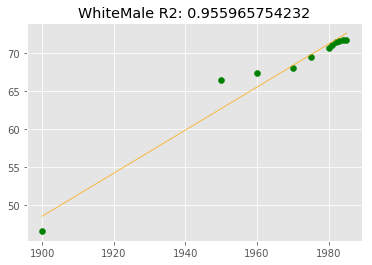

In [86]:
model.fit(X_train, y_train)
drawLine(model, X_train, y_train, "WhiteMale")

Print the actual 2014 'WhiteMale' life expectancy from your loaded dataset

In [87]:
X[X.Year == 2014]

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
39,2014,76.7,81.4,72.5,78.4


Repeat the process, but instead of for WhiteMale, this time select BlackFemale. Create a slice for BlackFemales, fit your model, and then call `drawLine`. Lastly, print out the actual 2014 BlackFemale life expectancy:

/home/roman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/home/roman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/roman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/roman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


('Est 2014 BlackFemale Life Expectancy: ', array([ 88.6988994]))
('Est 2030 BlackFemale Life Expectancy: ', array([ 96.11438808]))
('Est 2045 BlackFemale Life Expectancy: ', array([ 103.06640871]))


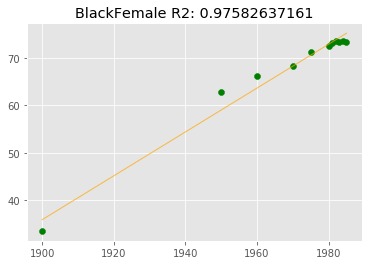

In [88]:
X_train = X.Year[X.Year < 1986].reshape(-1,1)
y_train = X.BlackFemale[0:len(X_train)].reshape(-1,1)
X_test = X.Year[X.Year > 1986].reshape(-1,1)
y_test = X.BlackFemale[len(X_train)+1:].reshape(-1,1)
model.fit(X_train, y_train)
drawLine(model, X_train, y_train, "BlackFemale")

In [89]:
X[X.Year == 2014]

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
39,2014,76.7,81.4,72.5,78.4


Lastly, print out a correlation matrix for your entire dataset, and display a visualization of the correlation matrix, just as we described in the visualization section of the course:

In [100]:
from matplotlib import cm as cm

corr = X.corr()

names = ['Year','WhiteMale','WhiteFemale','BlackMale','BlackFemale']

# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=0.85, vmax=1)
fig.colorbar(cax)

ax.set_xticklabels(names)
ax.set_yticklabels(names)


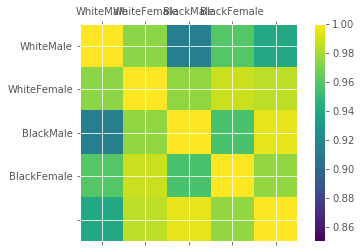

In [101]:
plt.show()

### Notes On Fitting, Scoring, and Predicting:

Here's a hint to help you complete the assignment without pulling your hair out! When you use `.fit()`, `.score()`, and `.predict()` on your model, SciKit-Learn expects your training data to be in spreadsheet (2D Array-Like) form. This means you can't simply pass in a 1D Array (slice) and get away with it.

To properly prep your data, you have to pass in a 2D Numpy Array, or a dataframe. But what happens if you really only want to pass in a single feature?

If you slice your dataframe using `df[['ColumnName']]` syntax, the result that comes back is actually a _dataframe_. Go ahead and do a `type()` on it to check it out. Since it's already a dataframe, you're good -- no further changes needed.

But if you slice your dataframe using the `df.ColumnName` syntax, OR if you call `df['ColumnName']`, the result that comes back is actually a series (1D Array)! This will cause SKLearn to bug out. So if you are slicing using either of those two techniques, before sending your training or testing data to `.fit` / `.score`, do `any_column = my_column.reshape(-1,1)`. 

This will convert your 1D array of `[n_samples]`, to a 2D array shaped like `[n_samples, 1]`. A single feature, with many samples.

If you did something like `my_column = [my_column]`, that would produce an array in the shape of `[1, n_samples]`, which is incorrect because SKLearn expects your data to be arranged as `[n_samples, n_features]`. Keep in mind, all of the above only relates to your `X` or input data, and does not apply to your `y` or labels.